# **Ciência de Dados - IFSP Campinas**
# Trabalho Interdisciplinar - 2s2021 - D2APR/D2TEC

**Created by:**<br>
Rodrigo Barros ([@rpbarros](https://github.com/rpbarros)) - CP3013502 <br>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

<h2 align="center">Flights in Brazil</h2>
<h2 align="center">An study on brazilian fly dataset for 2016/2017</h2>
<h3 align="center">Predict best fly choices</h3>
<img src="./images/airplane.jpg">

---



## 0. Imports and default settings for plotting

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import plotly.offline as pyo
import chart_studio.plotly as py
from sklearn import metrics 
import plotly.graph_objects as go
import geopandas as gpd
import warnings

import datetime as dt

warnings.filterwarnings('ignore')
pd.options.display.max_columns = 50

pd.set_option("display.max_rows", 150)

sns.set_theme(style="whitegrid")

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

%matplotlib inline

## 🔲 1. Frame the Problem

### 📄 1.1. Context

Brazil is the largest country in both South America and Latin America. At 8.5 million square kilometers (3,300,000 sq mi) and with over 211 million people, Brazil is the world's fifth-largest country by area and the sixth most populous. Its capital is Brasília, and its most populous city is São Paulo. The federation is composed of the union of the 26 states and the Federal District.
There are about 2,500 airports in Brazil, including landing fields: the second largest number in the world, after the United States. São Paulo–Guarulhos International Airport, near São Paulo, is the largest and busiest airport with nearly 20 million passengers annually, while handling the vast majority of commercial traffic for the country.
As one of the biggest emerging countries, Brazilian civil aircraft fleet is one of the largest around the world, with more than 10,000 units flying. With these numbers understanding the civil aircraft market seems important. Nowdays, Brazil holds fifteen actives airlines companies. 
With this study the proposal is to objective analise Brazilian commercial airplane routes and its operating companies, including source/destination airports, delays and cancelation in order to get a better understanding of Brazilian aircraft market, its operators and routes.



**References:** <br/>
[Airlines of Brazil - Wikipedia](https://en.wikipedia.org/wiki/List_of_airlines_of_Brazil)<br/>
[ANAC - Wikipedia](https://en.wikipedia.org/wiki/National_Civil_Aviation_Agency_of_Brazil)<br/>
[Brazil - Wikipedia](https://en.wikipedia.org/wiki/Brazil)<br/>


### 🧠 1.2. Challenge

#### 🎯 **Objective:**
**Use machine learning to create a model that predicts which is the best aircraft company and airport in Brazilian market.** <br/>

#### **Solution Planning:**
- **Classification problem**
- Metrics:
    - Accuracy
    - Precision
    - Recall
    - F1 Score
    - ROC Curve
    - AUC
- Data sources:
    - [Flights in Brazil](https://www.kaggle.com/ramirobentes/flights-in-brazil)
- No assumptions
- Project deliverable:
    - A simple exploratory data analysis
    - **A ML system/model** launched in _production_ <br/><br/>

## 💽 2. Get the Data

The considered dataset contains information of 2,5 million flights registered by the National Civil Aviation Agency of Brazil. Each register contains 21 features describing that specific flight, including Source/Destinaton airports, Delays, Geo Location, etc.
This dataset does not have legal obligations and sensitive information.

### 2.1. Download the Data

Flights in Brazil dataset is available at this [Kaggle repository](https://www.kaggle.com/ramirobentes/flights-in-brazil).

### 2.2. Load the Data

In [2]:
#this approach is used to overcome the restriction as this notebook is versioned at github and it do not allow files above 100mb.
import zipfile
with zipfile.ZipFile('./datasets/BrFlights2.zip', 'r') as zip_ref:
    zip_ref.extractall('./datasets/')

In [4]:
import pandas as pd
df_full = pd.read_csv('./datasets/BrFlights2.csv', encoding="latin1")

In [5]:
df_full.head()

,Voos,Companhia.Aerea,Codigo.Tipo.Linha,Partida.Prevista,Partida.Real,Chegada.Prevista,Chegada.Real,Situacao.Voo,Codigo.Justificativa,Aeroporto.Origem,Cidade.Origem,Estado.Origem,Pais.Origem,Aeroporto.Destino,Cidade.Destino,Estado.Destino,Pais.Destino,LongDest,LatDest,LongOrig,LatOrig
0,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-30T08:58:00Z,2016-01-30T08:58:00Z,2016-01-30T10:35:00Z,2016-01-30T10:35:00Z,Realizado,NaN,Afonso Pena,Sao Jose Dos Pinhais,PR,Brasil,Salgado Filho,Porto Alegre,RS,Brasil,-51.175381,-29.993473,-49.172481,-25.532713
1,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-13T12:13:00Z,2016-01-13T12:13:00Z,2016-01-13T21:30:00Z,2016-01-13T21:30:00Z,Realizado,NaN,Salgado Filho,Porto Alegre,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473
2,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-29T12:13:00Z,2016-01-29T12:13:00Z,2016-01-29T21:30:00Z,2016-01-29T21:30:00Z,Realizado,NaN,Salgado Filho,Porto Alegre,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473
3,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-19T12:13:00Z,2016-01-18T12:03:00Z,2016-01-19T21:30:00Z,2016-01-18T20:41:00Z,Realizado,LIBERACAO SERV. TRAFEGO AEREO/ANTECIPACAO,Salgado Filho,Porto Alegre,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473
4,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-30T12:13:00Z,2016-01-30T12:13:00Z,2016-01-30T21:30:00Z,2016-01-30T21:30:00Z,Realizado,NaN,Salgado Filho,Porto Alegre,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473


In [24]:
#translate feature names to english
df_full.columns = ['flight_no', 'airline_company', 'route_type', 'departure_schedule', 'departure_actual', 
                       'arrival_schedule', 'arrival_actual', 'flight_status', 'just_code', 'airport_orig', 'city_orig', 
                       'state_orig', 'country_orig', 'airport_dest', 'city_dest', 'state_dest', 'country_dest',
                       'lon_dest', 'lat_dest', 'lon_orig', 'lat_orig']

df_full.head()

,flight_no,airline_company,route_type,departure_schedule,departure_actual,arrival_schedule,arrival_actual,flight_status,just_code,airport_orig,city_orig,state_orig,country_orig,airport_dest,city_dest,state_dest,country_dest,lon_dest,lat_dest,lon_orig,lat_orig
0,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-30 08:58:00,2016-01-30 08:58:00,2016-01-30 10:35:00,2016-01-30 10:35:00,Realizado,NaN,Afonso Pena,Sao Jose Dos Pinhais,PR,Brasil,Salgado Filho,Porto Alegre,RS,Brasil,-51.175381,-29.993473,-49.172481,-25.532713
1,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-13 12:13:00,2016-01-13 12:13:00,2016-01-13 21:30:00,2016-01-13 21:30:00,Realizado,NaN,Salgado Filho,Porto Alegre,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473
2,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-29 12:13:00,2016-01-29 12:13:00,2016-01-29 21:30:00,2016-01-29 21:30:00,Realizado,NaN,Salgado Filho,Porto Alegre,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473
3,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-19 12:13:00,2016-01-18 12:03:00,2016-01-19 21:30:00,2016-01-18 20:41:00,Realizado,LIBERACAO SERV. TRAFEGO AEREO/ANTECIPACAO,Salgado Filho,Porto Alegre,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473
4,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-30 12:13:00,2016-01-30 12:13:00,2016-01-30 21:30:00,2016-01-30 21:30:00,Realizado,NaN,Salgado Filho,Porto Alegre,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473


### 2.3. Take a quick look at the data structure

In [25]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542519 entries, 0 to 2542518
Data columns (total 21 columns):
 #   Column              Dtype         
---  ------              -----         
 0   flight_no           category      
 1   airline_company     category      
 2   route_type          category      
 3   departure_schedule  datetime64[ns]
 4   departure_actual    datetime64[ns]
 5   arrival_schedule    datetime64[ns]
 6   arrival_actual      datetime64[ns]
 7   flight_status       category      
 8   just_code           category      
 9   airport_orig        category      
 10  city_orig           category      
 11  state_orig          category      
 12  country_orig        category      
 13  airport_dest        category      
 14  city_dest           category      
 15  state_dest          category      
 16  country_dest        category      
 17  lon_dest            float64       
 18  lat_dest            float64       
 19  lon_orig            float64       
 20  la

Most of datatypes are identified as objects. Fix the datatypes is a must.

In [26]:
from datetime import datetime
df_full['departure_schedule'] = pd.to_datetime(df_full['departure_schedule'], format = '%Y-%m-%dT%H:%M:%SZ', errors = 'coerce')
df_full['departure_actual'] = pd.to_datetime(df_full['departure_actual'], format = '%Y-%m-%dT%H:%M:%SZ', errors = 'coerce')
df_full['arrival_schedule'] = pd.to_datetime(df_full['arrival_schedule'], format = '%Y-%m-%dT%H:%M:%SZ', errors = 'coerce')
df_full['arrival_actual'] = pd.to_datetime(df_full['arrival_actual'], format = '%Y-%m-%dT%H:%M:%SZ', errors = 'coerce')

df_full['airline_company'] = df_full['airline_company'].astype('category')
df_full['flight_no'] = df_full['flight_no'].astype('category')
df_full['flight_status'] = df_full['flight_status'].astype('category')
df_full['state_orig'] = df_full['state_orig'].astype('category')
df_full['state_dest'] = df_full['state_dest'].astype('category')
df_full['just_code'] = df_full['just_code'].astype('category')
df_full['city_orig'] = df_full['city_orig'].astype('category')
df_full['city_dest'] = df_full['city_dest'].astype('category')
df_full['route_type'] = df_full['route_type'].astype('category')
df_full['airport_orig'] = df_full['airport_orig'].astype('category')
df_full['airport_dest'] = df_full['airport_dest'].astype('category')
df_full['country_orig'] = df_full['country_orig'].astype('category')
df_full['country_dest'] = df_full['country_dest'].astype('category')



In [27]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542519 entries, 0 to 2542518
Data columns (total 21 columns):
 #   Column              Dtype         
---  ------              -----         
 0   flight_no           category      
 1   airline_company     category      
 2   route_type          category      
 3   departure_schedule  datetime64[ns]
 4   departure_actual    datetime64[ns]
 5   arrival_schedule    datetime64[ns]
 6   arrival_actual      datetime64[ns]
 7   flight_status       category      
 8   just_code           category      
 9   airport_orig        category      
 10  city_orig           category      
 11  state_orig          category      
 12  country_orig        category      
 13  airport_dest        category      
 14  city_dest           category      
 15  state_dest          category      
 16  country_dest        category      
 17  lon_dest            float64       
 18  lat_dest            float64       
 19  lon_orig            float64       
 20  la

### 2.4. Features description

Each row corresponds to a flight registered by ANAC in 2016/2017 years.

Each flight is represented by **21 features** (4 numeric and 13 categorical and 4 date time).

<table style="border-collapse: collapse;font-size: 14px; width:800px;">
  <tr>
    <th style="background-color:#D3DBDD;text-align:left">Feature</th>
    <th style="width:500px; background-color:#D3DBDD;text-align:center">Description</th>
    <th style="background-color:#D3DBDD;">Type</th>
  </tr>
  <tr>
    <td style="text-align:left">flight_no</td>
    <td style="text-align:center">Flight identification code</td>
    <td>Categorical</td>
  </tr>    
  <tr>
    <td style="text-align:left">airline_company</td>
    <td style="text-align:center">Name of the airline company</td>
    <td>Categorical</td>
  </tr>
  <tr>
    <td style="text-align:left">route_type </td>
    <td style="text-align:center">Type of the Route: Internacional, Regional, Nacional</td>
    <td>Categorical</td>
  </tr>
  <tr>
    <td style="text-align:left">departure_schedule</td>
    <td style="text-align:center">Date and time scheduled for the flight departure</td>
    <td>DateTime</td>
  </tr>
  <tr>
    <td style="text-align:left">departure_actual </td>
    <td style="text-align:center">Actual date and time of the flight departure</td>
    <td>DateTime</td>
  </tr>
  <tr>
    <td style="text-align:left">arrival_schedule </td>
    <td style="text-align:center">Date and time scheduled for the flight arrival</td>
    <td>DateTime</td>
  </tr>
  <tr>
    <td style="text-align:left">arrival_actual </td>
    <td style="text-align:center">Actual date and time of the flight arrival</td>
    <td>DateTime</td>
  </tr>
  <tr>
    <td style="text-align:left">flight_status</td>
    <td style="text-align:center">Flight status: Realizado, Cancelado</td>
    <td>Categorical</td>
  </tr>
  <tr>
    <td style="text-align:left">just_code</td>
    <td style="text-align:center">Explanation for any inconvenience on the flight.</td>
    <td>Categorical</td>
  </tr>
  <tr>
    <td style="text-align:left">airport_orig</td>
    <td style="text-align:center">Origin Airports name</td>
    <td>Categorical</td>
  </tr>
  <tr>
    <td style="text-align:left">city_orig</td>
    <td style="text-align:center">Origin Cities name</td>
    <td>Categorical</td>
  </tr>
  <tr>
    <td style="text-align:left">state_orig</td>
    <td style="text-align:center">Origin Country state, information valid for flights originated on Brazilian cities</td>
    <td>Categorical</td>
  </tr>
  <tr>
    <td style="text-align:left">country_orig</td>
    <td style="text-align:center">Origin Countries Name</td>
    <td>Categorical</td>
  </tr>
  <tr>
    <td style="text-align:left">airport_dest</td>
    <td style="text-align:center">Destination Airports Name</td>
    <td>Categorical</td>
  </tr>
  <tr>
    <td style="text-align:left">city_dest</td>
    <td style="text-align:center">Destination Cities name</td>
    <td>Categorical</td>
  </tr>
  <tr>
    <td style="text-align:left">state_dest</td>
    <td style="text-align:center">Destination Country state, information valid for flights destinated to Brazilian cities</td>
    <td>Categorical</td>
  </tr>
  <tr>
    <td style="text-align:left">country_dest</td>
    <td style="text-align:center">Destination Countries Name</td>
    <td>Categorical</td>
  </tr>
  <tr>
    <td style="text-align:left">lon_dest</td>
    <td style="text-align:center">Destination´s longitude coordinate</td>
    <td>Numeric</td>
  </tr>
  <tr>
    <td style="text-align:left">lat_dest</td>
    <td style="text-align:center">Destination´s latitude coordinate</td>
    <td>Numeric</td>
  </tr>  
  <tr>
    <td style="text-align:left">lon_orig</td>
    <td style="text-align:center">Origin´s longitude coordinate</td>
    <td>Numeric</td>
  </tr>
  <tr>
    <td style="text-align:left">lat_orig</td>
    <td style="text-align:center">Origin´s latitude coordinate</td>
    <td>Numeric</td>
  </tr>    
</table>

### 2.5. Inspect for missing data

In [28]:
df_full.isnull().sum()

flight_no                   0
airline_company             0
route_type                  0
departure_schedule          0
departure_actual       289196
arrival_schedule            0
arrival_actual         289196
flight_status               0
just_code             1510212
airport_orig                0
city_orig                   0
state_orig                  0
country_orig                0
airport_dest                0
city_dest                   0
state_dest                  0
country_dest                0
lon_dest                    0
lat_dest                    0
lon_orig                    0
lat_orig                    0
dtype: int64

It seems we have an equal number of missing values for departure and arrival actual datetime. This is possible to be related to cancelled flights. To confirm this information, a comparision with the number of cancelled flights can be easily done:

In [29]:
index = df_full.loc[df_full['flight_status'] == 'Cancelado'].index
len(index)

289196

Indeed, the number of cancelled flights is exactly the same as the number of missing departure/arrival actual datetime. Besides these missing values, the only other missing value is the Justification of a flight problem, which possibly will not be relevant for a flight that departed and arrived in time. This can also be checked.

In [30]:
index = df_full.loc[(df_full['departure_schedule'] != df_full['departure_actual']) | (df_full['arrival_schedule'] != df_full['arrival_actual'])].index
len(index)

1053799

The number of flights with departure and arrival not as expected does not match with the number of Justifications.

In [31]:
unmatch = df_full.loc[(df_full['departure_schedule'] == df_full['departure_actual']) & (df_full['arrival_schedule'] == df_full['arrival_actual']) & (df_full['just_code'] == df_full['just_code'])]
unmatch['just_code'].unique()

['ATRASOS NAO ESPECIFICOS - OUTROS', 'TROCA DE AERONAVE', 'AEROPORTO COM RESTRICOES OPERACIONAIS', 'AEROPORTO DESTINO ABAIXO DOS LIMITES', 'CONEXAO AERONAVE/VOLTA - VOO DE IDA NAO PENAL..., ..., 'CONEXAO DE AERONAVE', 'AVARIA DURANTE OPERACOES EM VOO', 'AEROPORTO ORIGEM ABAIXO DOS LIMITES', 'ANTECIPACAO DE HORARIO AUTORIZADA - ESPECIFIC..., 'AEROPORTO DE DESTINO INTERDITADO']
Length: 16
Categories (41, object): ['ABASTECIMENTO/DESTANQUEIO', 'AEROPORTO COM RESTRICOES OPERACIONAIS', 'AEROPORTO DE DESTINO INTERDITADO', 'AEROPORTO DE ORIGEM INTERDITADO', ..., 'PROGRAMADO - FERIADO NACIONAL', 'REMOCAO GELO/AGUA/LAMA/AREIA - EM AEROPORTO', 'SEGURANCA/PAX/CARGA/ALARME', 'TROCA DE AERONAVE']

Apparently, even though a flight is on time, for some reason the Justification field still apply. This may be related to a number of reasons, like a reschedule of a previous delayed flight. Given that, dataset seems to hold integrity and no additional data fix is needed.

(array([], dtype=float64), <a list of 0 Text xticklabel objects>)

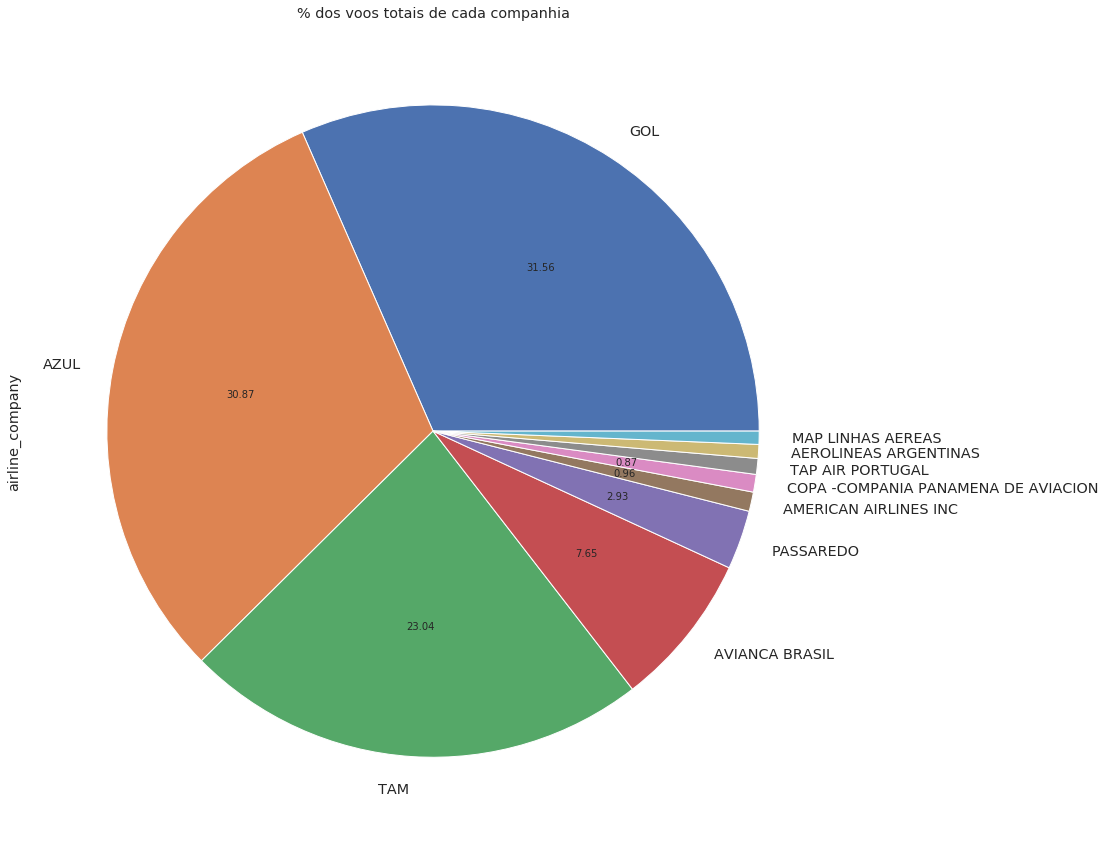

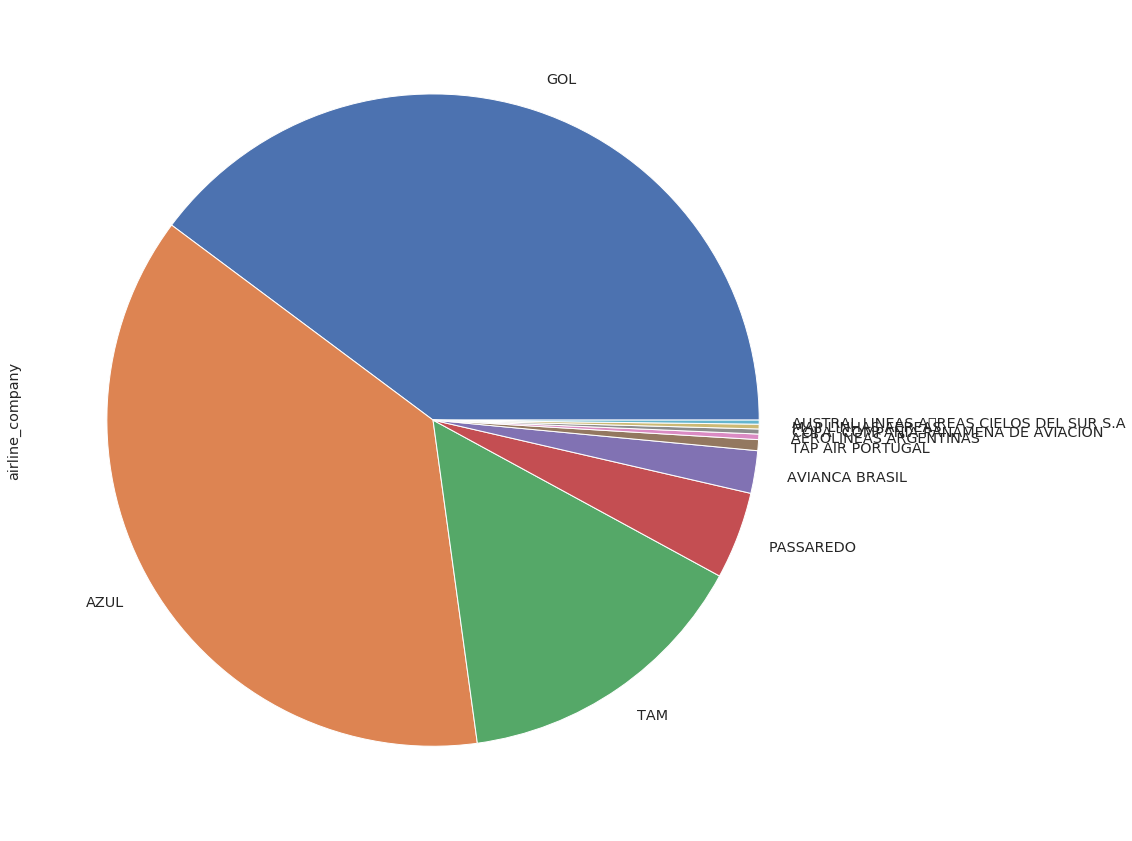

In [32]:
def my_autopct(pct): return ('%.2f' % pct) if pct > 0.8 else '' # horroroso

fig = plt.figure(figsize=(15,15)) 
df_full['airline_company'].value_counts().head(10).plot.pie(autopct=my_autopct) 
plt.title("% dos voos totais de cada companhia")

fig = plt.figure(figsize=(15,15)) 
df_full['airline_company'][df_full['flight_status'] == 'Cancelado'].value_counts().head(10).plot(kind='pie') 
plt.grid()

plt.xticks(rotation="vertical")


## 3. Exploratory Data Analysis

As a golden rule, it is importante to keep test data as untainted as possible. So, as a first step to start the EDA, it is important to separate Test dataset from Train dataset.



In [88]:
from sklearn.model_selection import train_test_split
#keep 35% os test data seems interesting, given the fact that a huge dataset is available.
testsize = 0.35

#random seed fixed as 42, in order to keep reproducibility.
randomseed = 42

df_train, df_test = train_test_split(df_full, test_size=testsize, random_state=randomseed)

So, from now on, the data to be used on EDA will be the Train dataset.

As a first step, it may be interesting to visualize how flights connects Brazilian and Foreign cities worldwide. An interesting approach is available at [coderzcolumn tutorials](https://coderzcolumn.com/tutorials/data-science/how-to-create-connection-map-chart-in-python-jupyter-notebook-plotly-and-geopandas#2.2).

In [89]:
## Please make a note that we are only taking first 2k to make run easy.
## final notebook should not have this.
df_sample = df_train.sample(frac=1.0).head(2000)

#international flights only
df_int = df_sample[df_sample["route_type"] == 'Internacional']

#national flights only
df_nat = df_sample[df_sample["route_type"] == 'Nacional']

#national flights only
df_reg = df_sample[df_sample["route_type"] == 'Regional']

In [35]:
df_int.head()

,flight_no,airline_company,route_type,departure_schedule,departure_actual,arrival_schedule,arrival_actual,flight_status,just_code,airport_orig,city_orig,state_orig,country_orig,airport_dest,city_dest,state_dest,country_dest,lon_dest,lat_dest,lon_orig,lat_orig
758229,TAM - 8029,TAM,Internacional,2016-10-07 07:40:00,2016-10-07 07:40:00,2016-10-07 11:30:00,2016-10-07 11:30:00,Realizado,NaN,Santiago Do Chile,Santiago Do Chile,N/I,Chile,Guarulhos - Governador Andre Franco Montoro,Guarulhos,SP,Brasil,-46.478126,-23.434553,-70.797235,-33.391189
92537,AUT - 2245,AUSTRAL LINEAS AREAS CIELOS DEL SUR S.A,Internacional,2016-02-09 20:40:00,2016-02-09 20:40:00,2016-02-09 22:40:00,2016-02-09 22:40:00,Realizado,NaN,Guarulhos - Governador Andre Franco Montoro,Guarulhos,SP,Brasil,Buenos Aires/Aeroparque,Buenos Aires/Aeroparque,N/I,Argentina,-58.536759,-34.816662,-46.478126,-23.434553
1011140,THY - 16,TURKISH AIRLINES INC.,Internacional,2017-01-23 00:55:00,2017-01-23 01:02:00,2017-01-23 03:25:00,2017-01-23 03:26:00,Realizado,NaN,Buenos Aires,Buenos Aires,N/I,Argentina,Guarulhos - Governador Andre Franco Montoro,Guarulhos,SP,Brasil,-46.478126,-23.434553,-58.534828,-34.815004
2536245,AMX - 15,AEROMEXICO,Internacional,2017-04-08 22:55:00,2017-04-08 22:55:00,2017-04-09 09:05:00,2017-04-09 09:05:00,Realizado,NaN,Guarulhos - Governador Andre Franco Montoro,Guarulhos,SP,Brasil,Mexico,Mexico,N/I,Mexico,-99.071908,19.436076,-46.478126,-23.434553
369666,TAP - 103,TAP AIR PORTUGAL,Internacional,2016-05-09 06:15:00,2016-05-09 06:15:00,2016-05-09 15:55:00,2016-05-09 15:55:00,Realizado,NaN,Lisboa,Lisboa,N/I,Portugal,Tancredo Neves,Confins,MG,Brasil,-43.965396,-19.634099,-9.135367,38.775594


In [36]:
df_nat.head()

,flight_no,airline_company,route_type,departure_schedule,departure_actual,arrival_schedule,arrival_actual,flight_status,just_code,airport_orig,city_orig,state_orig,country_orig,airport_dest,city_dest,state_dest,country_dest,lon_dest,lat_dest,lon_orig,lat_orig
1165334,AZU - 2767,AZUL,Nacional,2017-04-01 09:35:00,2017-04-01 09:56:00,2017-04-01 10:45:00,2017-04-01 10:59:00,Realizado,DEFEITOS DA AERONAVE,Eurico De Aguiar Salles,Vitoria,ES,Brasil,Santos Dumont,Rio De Janeiro,RJ,Brasil,-43.164876,-22.911144,-40.283535,-20.257649
254327,TAM - 3894,TAM,Nacional,2016-03-23 14:25:00,2016-03-23 14:25:00,2016-03-23 16:40:00,2016-03-23 16:40:00,Realizado,NaN,Guarulhos - Governador Andre Franco Montoro,Guarulhos,SP,Brasil,Deputado Luis Eduardo Magalhaes,Salvador,BA,Brasil,-38.331241,-12.911098,-46.478126,-23.434553
503471,AZU - 4254,AZUL,Nacional,2016-07-11 00:25:00,NaT,2016-07-11 01:20:00,NaT,Cancelado,AUTORIZADO,Senador Petronio Portella,Teresina,PI,Brasil,Marechal Cunha Machado,Sao Luis,MA,Brasil,-44.234880,-2.584993,-42.821170,-5.063543
884048,GLO - 1003,GOL,Nacional,2016-12-14 07:10:00,2016-12-14 07:10:00,2016-12-14 08:15:00,2016-12-14 08:15:00,Realizado,NaN,Santos Dumont,Rio De Janeiro,RJ,Brasil,Congonhas,Sao Paulo,SP,Brasil,-46.656584,-23.627325,-43.164876,-22.911144
2065422,AZU - 4423,AZUL,Nacional,2015-07-27 18:45:00,2015-07-27 19:22:00,2015-07-27 20:25:00,2015-07-27 21:11:00,Realizado,DEFEITOS DA AERONAVE,Tancredo Neves,Confins,MG,Brasil,Afonso Pena,Sao Jose Dos Pinhais,PR,Brasil,-49.172481,-25.532713,-43.965396,-19.634099


In [37]:
df_reg.head()

,flight_no,airline_company,route_type,departure_schedule,departure_actual,arrival_schedule,arrival_actual,flight_status,just_code,airport_orig,city_orig,state_orig,country_orig,airport_dest,city_dest,state_dest,country_dest,lon_dest,lat_dest,lon_orig,lat_orig
404056,GLO - 6845,GOL,Regional,2016-05-11 18:55:00,2016-05-11 18:55:00,2016-05-11 20:05:00,2016-05-11 20:05:00,Realizado,NaN,Santos Dumont,Rio De Janeiro,RJ,Brasil,Tancredo Neves,Confins,MG,Brasil,-43.965396,-19.634099,-43.164876,-22.911144
99294,AZU - 2796,AZUL,Regional,2016-02-24 08:25:00,NaT,2016-02-24 10:25:00,NaT,Cancelado,AUTORIZADO,Deputado Luis Eduardo Magalhaes,Salvador,BA,Brasil,Presidente Castro Pinto,Bayeux,PB,Brasil,-34.950614,-7.147060,-38.331241,-12.911098
1592872,AZU - 2540,AZUL,Regional,2015-02-07 08:15:00,NaT,2015-02-07 09:42:00,NaT,Cancelado,CANCELAMENTO - AEROPORTO ORIGEM ABAIXO LIMITES,Tancredo Neves,Confins,MG,Brasil,Mario De Almeida Franco,Uberaba,MG,Brasil,-47.962370,-19.766046,-43.965396,-19.634099
888953,GLO - 1271,GOL,Regional,2016-12-09 11:10:00,NaT,2016-12-09 12:35:00,NaT,Cancelado,CANCELAMENTO - AEROPORTO ORIGEM ABAIXO LIMITES,Regional Hugo Cantergiani,Caxias Do Sul,RS,Brasil,Congonhas,Sao Paulo,SP,Brasil,-46.656584,-23.627325,-51.186930,-29.194919
725892,PTB - 2200,PASSAREDO,Regional,2016-10-09 12:35:00,2016-10-09 12:24:00,2016-10-09 14:10:00,2016-10-09 14:00:00,Realizado,LIBERACAO SERV. TRAFEGO AEREO/ANTECIPACAO,Presidente Juscelino Kubitschek,Brasilia,DF,Brasil,Leite Lopes,Ribeirao Preto,SP,Brasil,-47.775167,-21.134751,-47.917235,-15.869737


In [38]:
#plotting international flights
df_cnt = df_int.groupby(["lon_dest","lat_dest","lon_orig","lat_orig"]).count()[["flight_no"]].rename(columns={"flight_no":"num_flights"}).reset_index()
df_cnt = df_cnt.merge(df_int, how="left", left_on=["lon_dest","lat_dest","lon_orig","lat_orig"], right_on=["lon_dest","lat_dest","lon_orig","lat_orig"])

df_cnt.head()

,lon_dest,lat_dest,lon_orig,lat_orig,num_flights,flight_no,airline_company,route_type,departure_schedule,departure_actual,arrival_schedule,arrival_actual,flight_status,just_code,airport_orig,city_orig,state_orig,country_orig,airport_dest,city_dest,state_dest,country_dest
0,-99.071908,19.436076,-46.478126,-23.434553,4,AMX - 15,AEROMEXICO,Internacional,2017-04-08 22:55:00,2017-04-08 22:55:00,2017-04-09 09:05:00,2017-04-09 09:05:00,Realizado,NaN,Guarulhos - Governador Andre Franco Montoro,Guarulhos,SP,Brasil,Mexico,Mexico,N/I,Mexico
1,-99.071908,19.436076,-46.478126,-23.434553,4,AMX - 15,AEROMEXICO,Internacional,2016-02-13 23:55:00,2016-02-13 23:55:00,2016-02-14 09:50:00,2016-02-14 09:50:00,Realizado,NaN,Guarulhos - Governador Andre Franco Montoro,Guarulhos,SP,Brasil,Mexico,Mexico,N/I,Mexico
2,-99.071908,19.436076,-46.478126,-23.434553,4,TAM - 8112,TAM,Internacional,2015-11-08 23:25:00,2015-11-08 23:25:00,2015-11-09 09:15:00,2015-11-09 09:15:00,Realizado,NaN,Guarulhos - Governador Andre Franco Montoro,Guarulhos,SP,Brasil,Mexico,Mexico,N/I,Mexico
3,-99.071908,19.436076,-46.478126,-23.434553,4,AMX - 15,AEROMEXICO,Internacional,2016-05-07 22:55:00,NaT,2016-05-08 09:05:00,NaT,Cancelado,CANCELAMENTO POR MOTIVOS TECNICOS - OPERACIONAIS,Guarulhos - Governador Andre Franco Montoro,Guarulhos,SP,Brasil,Mexico,Mexico,N/I,Mexico
4,-95.336783,29.990220,-43.249423,-22.813410,1,UAL - 128,UNITED AIRLINES,Internacional,2015-05-16 21:11:00,2015-05-16 21:11:00,2015-05-17 07:30:00,2015-05-17 07:30:00,Realizado,NaN,Aeroporto Internacional Do Rio De Janeiro/Galeao,Rio De Janeiro,RJ,Brasil,Houston,Houston,N/I,Estados Unidos


In [39]:
import plotly.graph_objects as go

In [40]:
fig = go.Figure()

source_to_dest = zip(df_cnt["lat_orig"], df_cnt["lat_dest"],
                     df_cnt["lon_orig"], df_cnt["lon_dest"],
                     df_cnt["num_flights"])

## Loop thorugh each flight entry to add line between source and destination
for slat,dlat, slon, dlon, num_flights in source_to_dest:
    fig.add_trace(go.Scattergeo(
                        lat = [slat,dlat],
                        lon = [slon, dlon],
                        mode = 'lines',
                        line = dict(width = num_flights/50, color="red")
                        ))

## Logic to create labels of source and destination cities of flights
cities = df_cnt["city_orig"].values.tolist()+df_cnt["city_dest"].values.tolist()
countries = df_cnt["country_orig"].values.tolist()+df_cnt["country_dest"].values.tolist()
scatter_hover_data = [country + " : "+ city for city, country in zip(cities, countries)]

## Loop thorugh each flight entry to plot source and destination as points.
fig.add_trace(
    go.Scattergeo(
                lon = df_cnt["lon_orig"].values.tolist()+df_cnt["lon_dest"].values.tolist(),
                lat = df_cnt["lat_orig"].values.tolist()+df_cnt["lat_dest"].values.tolist(),
                hoverinfo = 'text',
                text = scatter_hover_data,
                mode = 'markers',
                marker = dict(size = 10, color = 'blue', opacity=0.1))
    )

## Update graph layout to improve graph styling.
fig.update_layout(title_text="Connection Map Depicting Flights from Brazil to All Other Countries",
                  height=700, width=900,
                  margin={"t":0,"b":0,"l":0, "r":0, "pad":0},
                  showlegend=False,
                  geo= dict(showland = True, landcolor = 'white', countrycolor = 'grey', bgcolor="lightgrey"))

fig.show()

In [41]:
#plotting national flights
df_cnt = df_nat.groupby(["lon_dest","lat_dest","lon_orig","lat_orig"]).count()[["flight_no"]].rename(columns={"flight_no":"num_flights"}).reset_index()
df_cnt = df_cnt.merge(df_nat, how="left", left_on=["lon_dest","lat_dest","lon_orig","lat_orig"], right_on=["lon_dest","lat_dest","lon_orig","lat_orig"])

df_cnt.head()

,lon_dest,lat_dest,lon_orig,lat_orig,num_flights,flight_no,airline_company,route_type,departure_schedule,departure_actual,arrival_schedule,arrival_actual,flight_status,just_code,airport_orig,city_orig,state_orig,country_orig,airport_dest,city_dest,state_dest,country_dest
0,-72.773428,-7.598349,-67.894367,-9.870171,1,GLO - 1939,GOL,Nacional,2015-05-20 14:20:00,2015-05-20 14:08:00,2015-05-20 15:35:00,2015-05-20 15:16:00,Realizado,ANTECIPACAO DE HORARIO AUTORIZADA,Placido De Castro,Sena Madureira,AC,Brasil,Cruzeiro Do Sul,Cruzeiro Do Sul,AC,Brasil
1,-69.883152,-6.636852,-64.725095,-3.380402,1,PAM - 5934,MAP LINHAS AEREAS,Nacional,2015-11-04 10:25:00,2015-11-04 09:55:00,2015-11-04 12:15:00,2015-11-04 11:47:00,Realizado,ATRASOS NAO ESPECIFICOS - OUTROS,Tefe,Tefe,AM,Brasil,Eirunepe,Eirunepe,AM,Brasil
2,-67.894367,-9.870171,-72.773428,-7.598349,2,GLO - 1938,GOL,Nacional,2015-11-23 16:05:00,NaT,2015-11-23 17:10:00,NaT,Cancelado,DEVIDO AEROPORTO DE DESTINO INTERDITADO,Cruzeiro Do Sul,Cruzeiro Do Sul,AC,Brasil,Placido De Castro,Sena Madureira,AC,Brasil
3,-67.894367,-9.870171,-72.773428,-7.598349,2,GLO - 5355,GOL,Nacional,2016-06-01 03:05:00,2016-06-01 03:13:00,2016-06-01 04:05:00,2016-06-01 04:30:00,Realizado,AEROPORTO DESTINO ABAIXO DOS LIMITES,Cruzeiro Do Sul,Cruzeiro Do Sul,AC,Brasil,Placido De Castro,Sena Madureira,AC,Brasil
4,-67.894367,-9.870171,-63.898320,-8.714170,2,TAM - 3594,TAM,Nacional,2016-08-29 00:43:00,2016-08-29 01:00:00,2016-08-29 01:48:00,2016-08-29 01:54:00,Realizado,LIBERACAO SERV. TRAFEGO AEREO/ANTECIPACAO,Governador Jorge Teixeira De Oliveira,Porto Velho,RO,Brasil,Placido De Castro,Sena Madureira,AC,Brasil


In [42]:
fig = go.Figure()

source_to_dest = zip(df_cnt["lat_orig"], df_cnt["lat_dest"],
                     df_cnt["lon_orig"], df_cnt["lon_dest"],
                     df_cnt["num_flights"])

## Loop thorugh each flight entry to add line between source and destination
for slat,dlat, slon, dlon, num_flights in source_to_dest:
    fig.add_trace(go.Scattergeo(
                        lat = [slat,dlat],
                        lon = [slon, dlon],
                        mode = 'lines',
                        line = dict(width = num_flights/50, color="red")
                        ))

## Logic to create labels of source and destination cities of flights
cities = df_cnt["city_orig"].values.tolist()+df_cnt["city_dest"].values.tolist()
countries = df_cnt["country_orig"].values.tolist()+df_cnt["country_dest"].values.tolist()
scatter_hover_data = [country + " : "+ city for city, country in zip(cities, countries)]

## Loop thorugh each flight entry to plot source and destination as points.
fig.add_trace(
    go.Scattergeo(
                lon = df_cnt["lon_orig"].values.tolist()+df_cnt["lon_dest"].values.tolist(),
                lat = df_cnt["lat_orig"].values.tolist()+df_cnt["lat_dest"].values.tolist(),
                hoverinfo = 'text',
                text = scatter_hover_data,
                mode = 'markers',
                marker = dict(size = 5, color = 'blue', opacity=0.1))
    )

## Update graph layout to improve graph styling.
fig.update_layout(
                  height=500, width=800, margin={"t":0,"b":0,"l":0, "r":0, "pad":0},
                  showlegend=False,
                  title_text = 'Connection Map Depicting Flights between Cities of Brazil',
                  geo = dict(projection_type = 'natural earth',scope = 'south america'),
                )

fig.show()

In [43]:
#plotting regional flights
df_cnt = df_reg.groupby(["lon_dest","lat_dest","lon_orig","lat_orig"]).count()[["flight_no"]].rename(columns={"flight_no":"num_flights"}).reset_index()
df_cnt = df_cnt.merge(df_reg, how="left", left_on=["lon_dest","lat_dest","lon_orig","lat_orig"], right_on=["lon_dest","lat_dest","lon_orig","lat_orig"])

df_cnt.head()

,lon_dest,lat_dest,lon_orig,lat_orig,num_flights,flight_no,airline_company,route_type,departure_schedule,departure_actual,arrival_schedule,arrival_actual,flight_status,just_code,airport_orig,city_orig,state_orig,country_orig,airport_dest,city_dest,state_dest,country_dest
0,-67.894367,-9.870171,-72.773428,-7.598349,1,GLO - 1799,GOL,Regional,2017-01-16 03:15:00,2017-01-16 03:15:00,2017-01-16 04:25:00,2017-01-16 04:25:00,Realizado,NaN,Cruzeiro Do Sul,Cruzeiro Do Sul,AC,Brasil,Placido De Castro,Sena Madureira,AC,Brasil
1,-60.046325,-3.035847,-67.894367,-9.870171,1,GLO - 1868,GOL,Regional,2017-04-09 03:35:00,NaT,2017-04-09 05:20:00,NaT,Cancelado,AUTORIZADO,Placido De Castro,Sena Madureira,AC,Brasil,Eduardo Gomes,Manaus,AM,Brasil
2,-60.046325,-3.035847,-66.899163,-4.875501,1,PAM - 5915,MAP LINHAS AEREAS,Regional,2015-05-22 11:45:00,2015-05-22 11:45:00,2015-05-22 13:45:00,2015-05-22 13:45:00,Realizado,NaN,Carauari,Carauari,AM,Brasil,Eduardo Gomes,Manaus,AM,Brasil
3,-60.046325,-3.035847,-64.769513,-7.278085,1,PAM - 5909,MAP LINHAS AEREAS,Regional,2015-10-19 11:10:00,NaT,2015-10-19 12:55:00,NaT,Cancelado,CANCELAMENTO POR MOTIVOS TECNICOS - OPERACIONAIS,Labrea,Labrea,AM,Brasil,Eduardo Gomes,Manaus,AM,Brasil
4,-60.046325,-3.035847,-63.070531,-7.539761,2,PAM - 5940,MAP LINHAS AEREAS,Regional,2017-05-11 11:51:00,2017-05-11 11:51:00,2017-05-11 13:30:00,2017-05-11 13:30:00,Realizado,NaN,Francisco Correa Da Cruz,Humaita,AM,Brasil,Eduardo Gomes,Manaus,AM,Brasil


In [44]:
fig = go.Figure()

source_to_dest = zip(df_cnt["lat_orig"], df_cnt["lat_dest"],
                     df_cnt["lon_orig"], df_cnt["lon_dest"],
                     df_cnt["num_flights"])

## Loop thorugh each flight entry to add line between source and destination
for slat,dlat, slon, dlon, num_flights in source_to_dest:
    fig.add_trace(go.Scattergeo(
                        lat = [slat,dlat],
                        lon = [slon, dlon],
                        mode = 'lines',
                        line = dict(width = num_flights/50, color="red")
                        ))

## Logic to create labels of source and destination cities of flights
cities = df_cnt["city_orig"].values.tolist()+df_cnt["city_dest"].values.tolist()
countries = df_cnt["country_orig"].values.tolist()+df_cnt["country_dest"].values.tolist()
scatter_hover_data = [country + " : "+ city for city, country in zip(cities, countries)]

## Loop thorugh each flight entry to plot source and destination as points.
fig.add_trace(
    go.Scattergeo(
                lon = df_cnt["lon_orig"].values.tolist()+df_cnt["lon_dest"].values.tolist(),
                lat = df_cnt["lat_orig"].values.tolist()+df_cnt["lat_dest"].values.tolist(),
                hoverinfo = 'text',
                text = scatter_hover_data,
                mode = 'markers',
                marker = dict(size = 5, color = 'blue', opacity=0.1))
    )

## Update graph layout to improve graph styling.
fig.update_layout(
                  height=500, width=800, margin={"t":0,"b":0,"l":0, "r":0, "pad":0},
                  showlegend=False,
                  title_text = 'Connection Map Depicting Flights between Cities of Brazil',
                  geo = dict(projection_type = 'natural earth',scope = 'south america'),
                )

fig.show()

As a next step on the EDA, a comparision of the # of flights by each type of route might be relevant. To perform the EDA, no need to use a sampled dataset derived from df_train.

In [45]:
#international flights only
df_int = df_train[df_train["route_type"] == 'Internacional']

#national flights only
df_nat = df_train[df_train["route_type"] == 'Nacional']

#national flights only
df_reg = df_train[df_train["route_type"] == 'Regional']

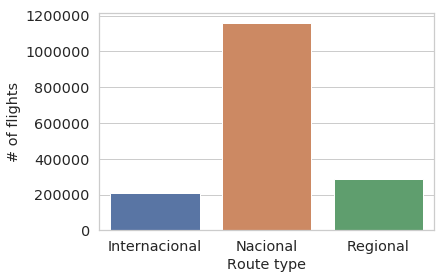

In [46]:
ax = sns.countplot(x="route_type", data=df_train)
mticker = ticker.ScalarFormatter(useOffset=False)
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker)
ax.ticklabel_format(axis='y', style='plain', useOffset=False)
ax.set_xlabel('Route type')
ax.set_ylabel('# of flights')
plt.show()

This seems to be an interesting information as there are expressively more 'Nacional' flights than 'Internacional' and 'Regional'. This sees to indicate that most of airline companies operates within a majority of 'Nacional' route types on its business model.
Going further, a check on companies share of flights seems relevant.

Text(0.5, 1.0, 'Biggest Airline Companies in Brazil')

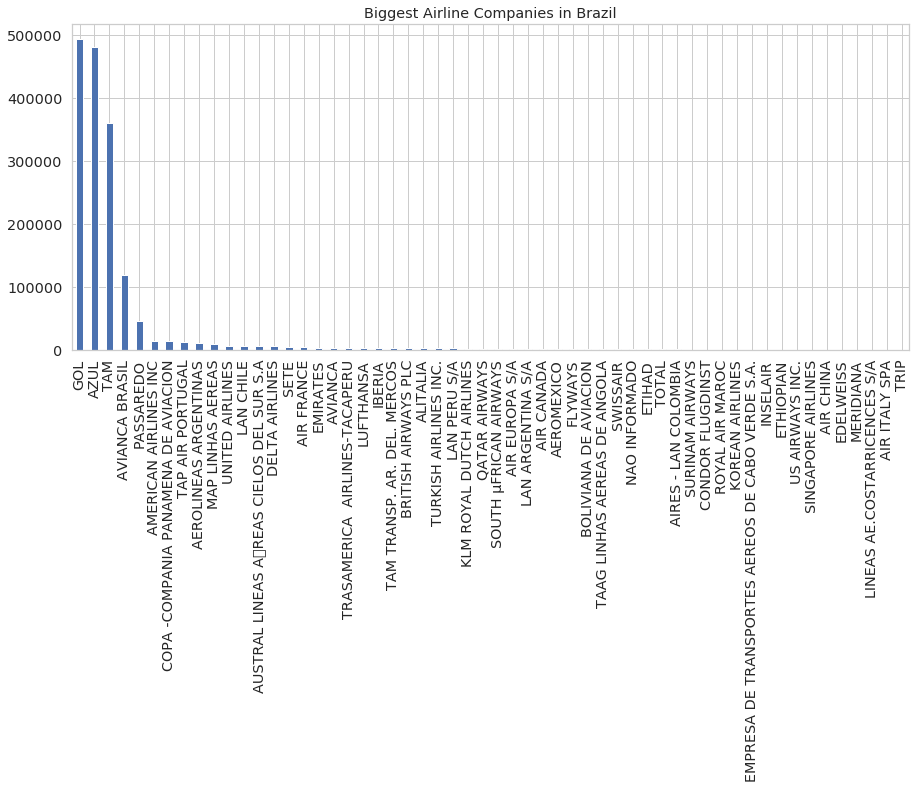

In [47]:
airlines = df_train.airline_company.value_counts()
airlines = airlines[airlines > 0]
plt.figure(figsize=(15,6))
plot = airlines.plot(kind="bar")
plot.set_title("Biggest Airline Companies in Brazil")

It is noticiable that Tam, Azul and Gol are the biggest airline companies operating in Brazil.
Another approach is repear the comparision but checking only each route type separated.

Text(0.5, 1.0, 'Biggest International Operators in Brazil')

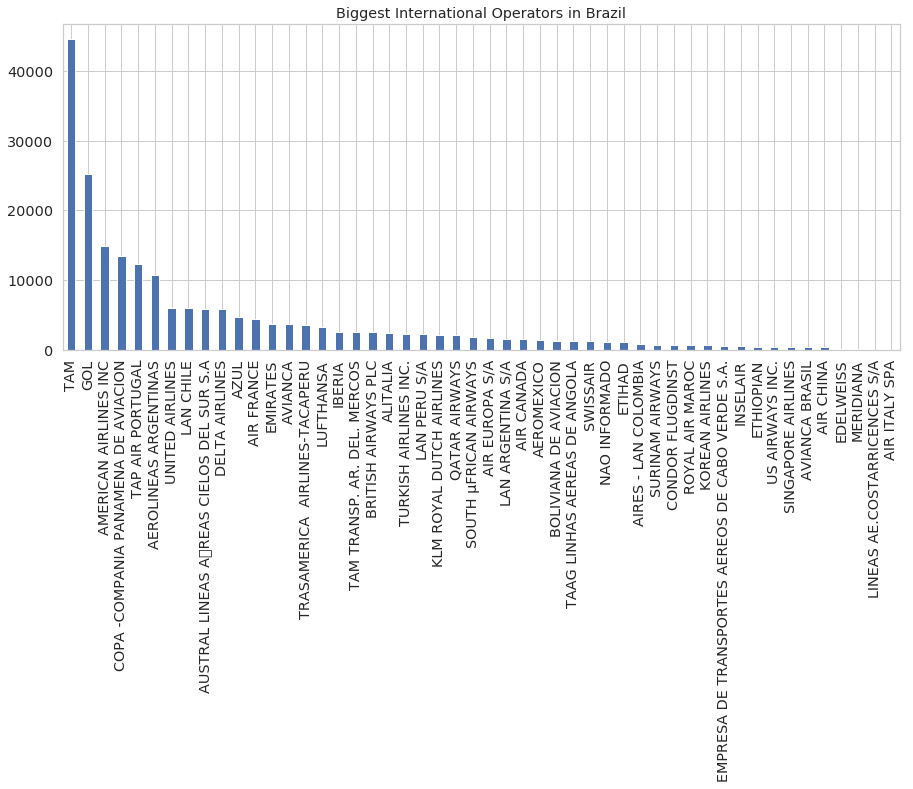

In [48]:
airlines = df_int.airline_company.value_counts()
airlines = airlines[airlines > 0]
plt.figure(figsize=(15,6))
plot = airlines.plot(kind="bar")
plot.set_title("Biggest International Operators in Brazil")

By looking into International slice of flights, it is noticiable that American Airlines is also a major player in Brazilian market for this route type.

Text(0.5, 1.0, 'Biggest National Operators in Brazil')

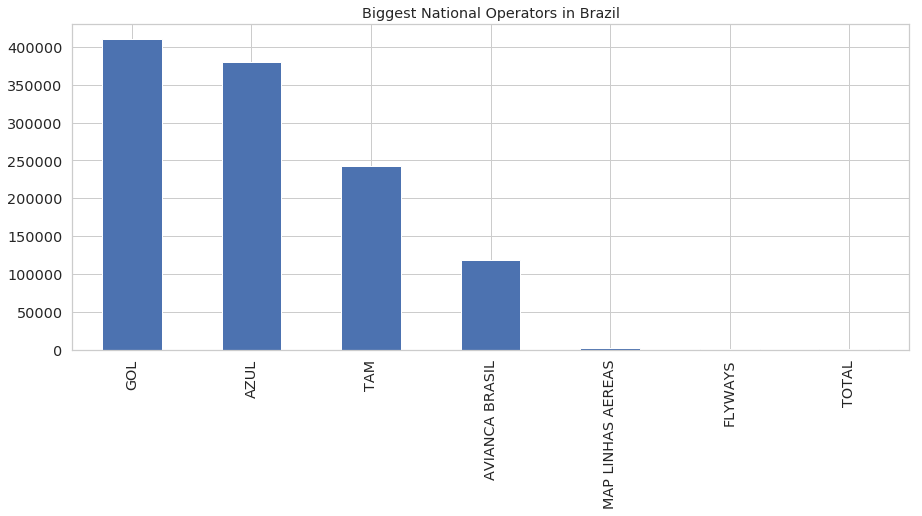

In [49]:
airlines = df_nat.airline_company.value_counts()
airlines = airlines[airlines > 0]
plt.figure(figsize=(15,6))
plot = airlines.plot(kind="bar")
plot.set_title("Biggest National Operators in Brazil")

By checking only 'National' flights, it pops out the great concentration on Brazilian market, that is dominated by only 4 companies in a total of 7 companies active in this market.

The same approach can be applied for 'Regional' flights.

Text(0.5, 1.0, 'Biggest Regional Operators in Brazil')

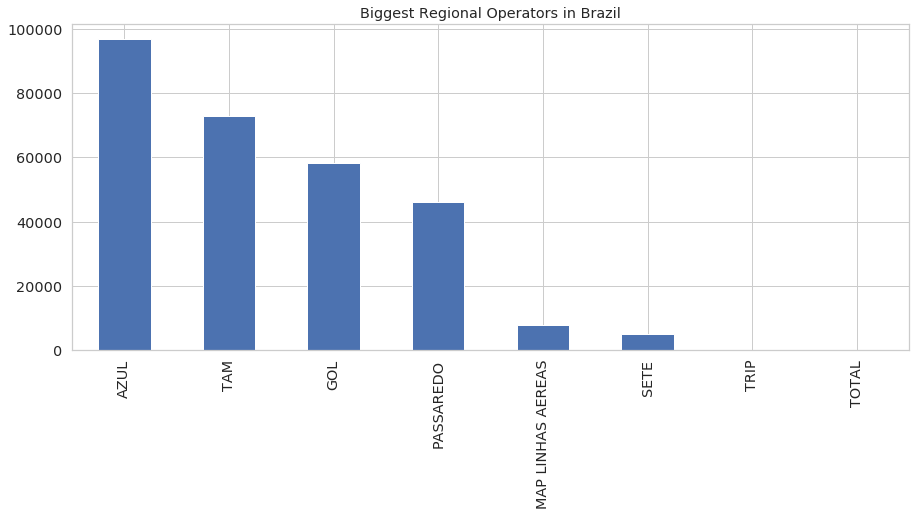

In [50]:
airlines = df_reg.airline_company.value_counts()
airlines = airlines[airlines > 0]
plt.figure(figsize=(15,6))
plot = airlines.plot(kind="bar")
plot.set_title("Biggest Regional Operators in Brazil")

Regional flights is even more restrict, with 6 active companies only. The same top 3 from National airlines are also leading this segment.

As a next step, it is also possible to explore a little deeper on this dataset by checking flights Canceled or Completed.

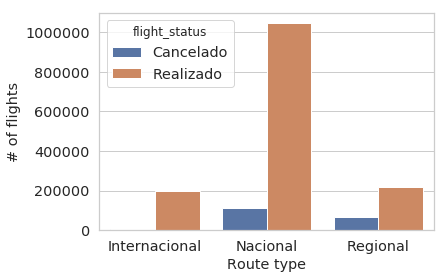

In [51]:
ax = sns.countplot(x="route_type", hue="flight_status", data=df_train)
mticker = ticker.ScalarFormatter(useOffset=False)
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker)
ax.ticklabel_format(axis='y', style='plain', useOffset=False)
ax.set_xlabel('Route type')
ax.set_ylabel('# of flights')
plt.show()

Something that is noticiable is that the number of cancelled flights for 'Internacional' flights is expressively smaller than 'Nacional' flights. At least visually, it is also noticiable that a 'Regional' flight is more likely to be cancelled than a 'Nacional' flight, based on the bars comparision.

 It is also possible to dive in to check flight status within each type of route.

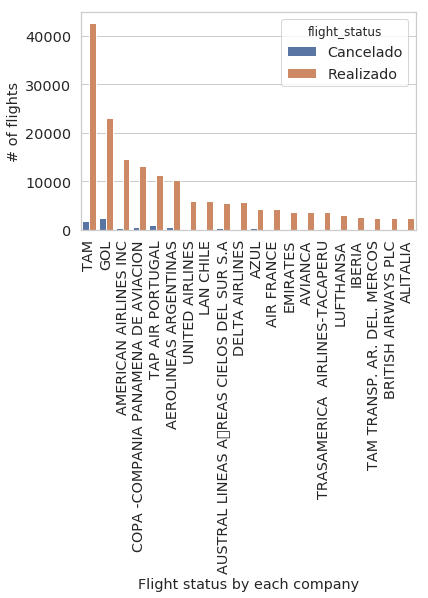

In [52]:
ax = sns.countplot(x="airline_company", hue="flight_status", order = df_int['airline_company'].value_counts().head(20).index, data=df_int)
plt.xticks(rotation=90)
mticker = ticker.ScalarFormatter(useOffset=False)
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker)
ax.ticklabel_format(axis='y', style='plain', useOffset=False)
ax.set_xlabel('Flight status by each company')
ax.set_ylabel('# of flights')
plt.show()


Checking above comparision, some can say that Gol is an airline company to be avoided when talking about international flights. Its rate of cancelation is bigger than every other company. It seems to be some times bigger than Tam airline company. Air France(TAP)?? is also an airline company that is worth to be careful, although the flight number is small, the cancellation rate seems also expressive.

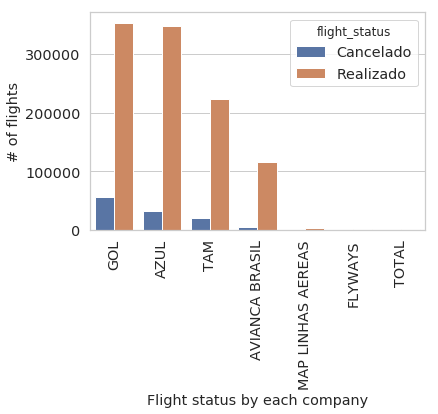

In [53]:
ax = sns.countplot(x="airline_company", hue="flight_status", order = df_nat['airline_company'].value_counts().head(7).index, data=df_nat)
plt.xticks(rotation=90)
mticker = ticker.ScalarFormatter(useOffset=False)
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker)
ax.ticklabel_format(axis='y', style='plain', useOffset=False)
ax.set_xlabel('Flight status by each company')
ax.set_ylabel('# of flights')
plt.show()

Analyzing National data, Gol is also a company to avoid, as it has twice as many cancellation than Azul, which is the second in this list.

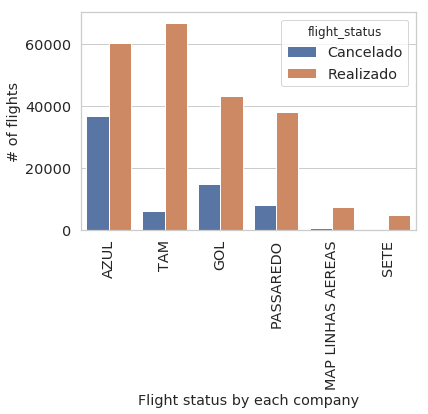

In [54]:
ax = sns.countplot(x="airline_company", hue="flight_status", order = df_reg['airline_company'].value_counts().head(6).index, data=df_reg)
plt.xticks(rotation=90)
mticker = ticker.ScalarFormatter(useOffset=False)
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker)
ax.ticklabel_format(axis='y', style='plain', useOffset=False)
ax.set_xlabel('Flight status by each company')
ax.set_ylabel('# of flights')
plt.show()

On Regional flights, Azul is the company that is clearly to avoid as it has a cancellation rate so high that it is (almost the same number)?? of flights that were effectively done.

Another important information about flight is to known how likely a flight will happen but in a delayed time.
In order to do so, by checking Justification field is enough to determine if a flight was delayed or not. If this field is not 'NaN', it means that the flight was delayed. An anticipation of a new feature 'Delayed' comes in at this time.

In [55]:
df_train['is_delayed'] = df_train['just_code'].str.len() > 0

#international flights only
df_int = df_train[df_train["route_type"] == 'Internacional']

#national flights only
df_nat = df_train[df_train["route_type"] == 'Nacional']

#national flights only
df_reg = df_train[df_train["route_type"] == 'Regional']

Also, a cancelled flight should not be considered in this analysis, so in each of the analysis below, cancelled flights will be removed from dataset.

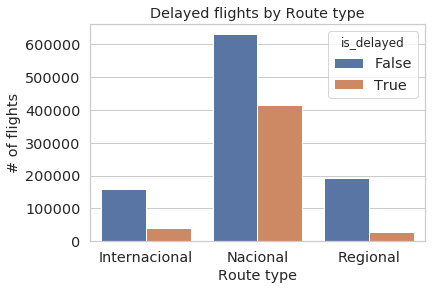

In [56]:
ax = sns.countplot(x="route_type", hue="is_delayed", data=df_train[df_train["flight_status"] == 'Realizado'])
mticker = ticker.ScalarFormatter(useOffset=False)
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker)
ax.ticklabel_format(axis='y', style='plain', useOffset=False)
ax.set_xlabel('Route type')
ax.set_ylabel('# of flights')
ax.set_title('Delayed flights by Route type')
plt.show()

Aproximately 40% of national flights are delayed, which seems to be a huge number of flights. International flights are delayed in aproximately 20% of the flights and Regional flights are even less delayed, aproximately 10%, in a visual inspection of this plot.

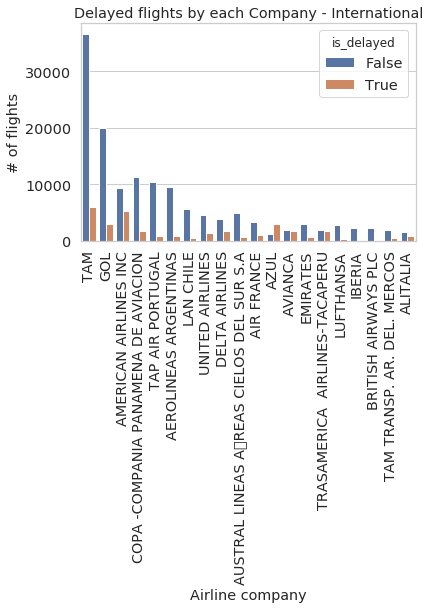

In [57]:
ds = df_int[df_int["flight_status"] == 'Realizado']

ax = sns.countplot(x="airline_company", hue="is_delayed", order = ds['airline_company'].value_counts().head(20).index, data=ds)
plt.xticks(rotation=90)
mticker = ticker.ScalarFormatter(useOffset=False)
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker)
ax.ticklabel_format(axis='y', style='plain', useOffset=False)
ax.set_title('Delayed flights by each Company - International')
ax.set_xlabel('Airline company')
ax.set_ylabel('# of flights')
plt.show()


In [58]:
df_int['Departure_Delays'] =df_int.departure_actual - df_int.departure_schedule
#df_int['Departure_Delays'] = df_int['Departure_Delays'].apply(lambda x : round(x.total_seconds()/60)) sep ==Realizados

def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
#_______________________________________________________________
# Creation of a dataframe with statitical infos on each airline:
global_stats = df_int['Departure_Delays'].groupby(df_int['airline_company']).apply(get_stats).unstack()
global_stats = global_stats.sort_values(by = 'count', ascending=False)
global_stats.head(10)


,min,max,count,mean
airline_company,,,,
TAM,-14 days +22:55:00,9 days 23:02:00,42662,0 days 00:02:56.555717031
GOL,-14 days +23:20:00,10 days 00:34:00,22939,0 days 00:01:09.384890361
AMERICAN AIRLINES INC,-32 days +00:53:00,10 days 23:03:00,14525,0 days 00:08:13.817555938
COPA -COMPANIA PANAMENA DE AVIACION,-31 days +01:07:00,1 days 02:44:00,13052,-1 days +23:52:23.269996936
TAP AIR PORTUGAL,-31 days +23:51:00,1 days 01:37:00,11288,-1 days +21:22:14.388731397
AEROLINEAS ARGENTINAS,-31 days +00:43:00,1 days 02:06:00,10255,-1 days +23:54:54.008776207
LAN CHILE,-28 days +00:34:00,5 days 05:45:00,5961,-1 days +23:52:17.564167087
UNITED AIRLINES,-31 days +01:20:00,4 days 23:51:00,5916,0 days 00:18:56.592292089
DELTA AIRLINES,-14 days +23:47:00,4 days 23:56:00,5645,0 days 00:07:01.721877767


In [59]:
airport_stats = df_int['Departure_Delays'].groupby(df_int['airport_orig']).apply(get_stats).unstack()
airport_stats = airport_stats.sort_values(by = 'count', ascending=False)
airport_stats.head(10)

,min,max,count,mean
airport_orig,,,,
Guarulhos - Governador Andre Franco Montoro,-32 days +23:49:00,10 days 23:03:00,59574,-1 days +23:46:07.833618693
Aeroporto Internacional Do Rio De Janeiro/Galeao,-31 days +00:37:00,10 days 00:21:00,20397,-1 days +23:48:52.566553905
Buenos Aires,-31 days +01:01:00,10 days 00:34:00,10785,-1 days +23:49:34.987482615
Buenos Aires/Aeroparque,-24 days +01:08:00,4 days 01:35:00,9301,0 days 00:01:27.609934415
Santiago Do Chile,-28 days +00:34:00,4 days 08:40:00,7584,0 days 00:04:07.523734177
Miami,-32 days +00:53:00,9 days 23:05:00,7583,-1 days +23:52:38.581036530
Panama,-31 days +01:07:00,1 days 02:44:00,6451,-1 days +23:48:06.780344133
Lisboa,-31 days +23:54:00,1 days 01:37:00,5423,-1 days +20:45:52.188825374
Lima,-15 days +23:46:00,4 days 23:45:00,4153,-1 days +17:55:01.820370817


By analysing this data segregated by airline company for international flights, Azul(TAM?) is the company that has the higher proportion of delayed flights among its total. Delayed flights are twice as many of flights without delay for Azul company.

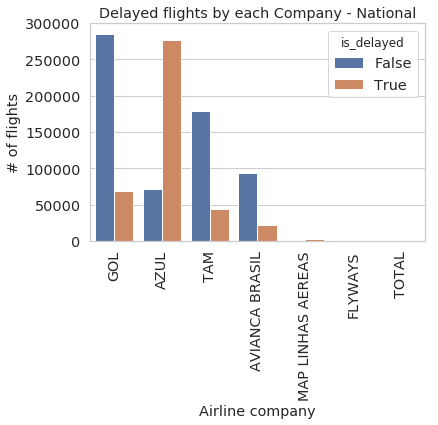

In [60]:
ds = df_nat[df_nat["flight_status"] == 'Realizado']

ax = sns.countplot(x="airline_company", hue="is_delayed", order = ds['airline_company'].value_counts().head(7).index, data=ds)
plt.xticks(rotation=90)
mticker = ticker.ScalarFormatter(useOffset=False)
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker)
ax.ticklabel_format(axis='y', style='plain', useOffset=False)
ax.set_title('Delayed flights by each Company - National')
ax.set_xlabel('Airline company')
ax.set_ylabel('# of flights')
plt.show()


Considering only national flights, Azul is by far the worst company in terms of following the appointment. Delayed flights sum more than 5 times of the flights that are in time.

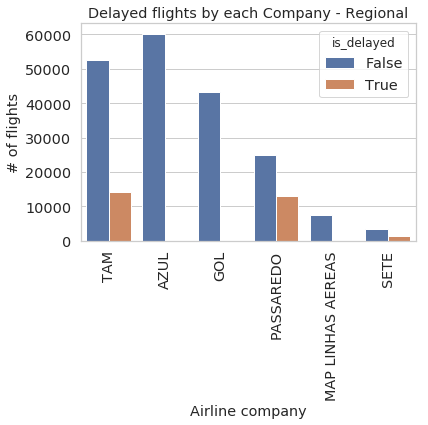

In [61]:
ds = df_reg[df_reg["flight_status"] == 'Realizado']

ax = sns.countplot(x="airline_company", hue="is_delayed", order = ds['airline_company'].value_counts().head(6).index, data=ds)
plt.xticks(rotation=90)
mticker = ticker.ScalarFormatter(useOffset=False)
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker)
ax.ticklabel_format(axis='y', style='plain', useOffset=False)
ax.set_title('Delayed flights by each Company - Regional')
ax.set_xlabel('Airline company')
ax.set_ylabel('# of flights')
plt.show()

Taking into account only the Regional flights, it seems pretty much clear that Azul has a very good performance in terms of being on time for this category of flight. Gol is also another Regional operator which stands for pontuality.

In [62]:
print(df_train['departure_actual'].dt.year.value_counts().sort_index())

2014.0         3
2015.0    611514
2016.0    542521
2017.0    310560
Name: departure_actual, dtype: int64


Per year, in the base there are: 3 flights in 2014, 611514 flights in 2015, 542521 flights in 2016 and 310,560 flights in 2017. We can see the distribution of these numbers in a bar chart.

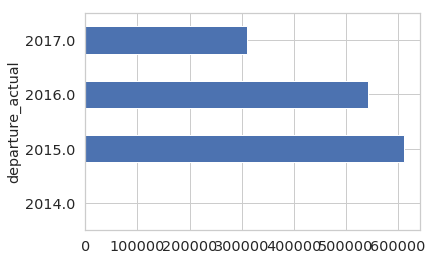

In [63]:
df_train.groupby(df_train['departure_actual'].dt.year).count()['flight_no'].plot.barh()

Airports most used as origin of flights.

Text(0.5, 1.0, 'Top 10 origin airports.')

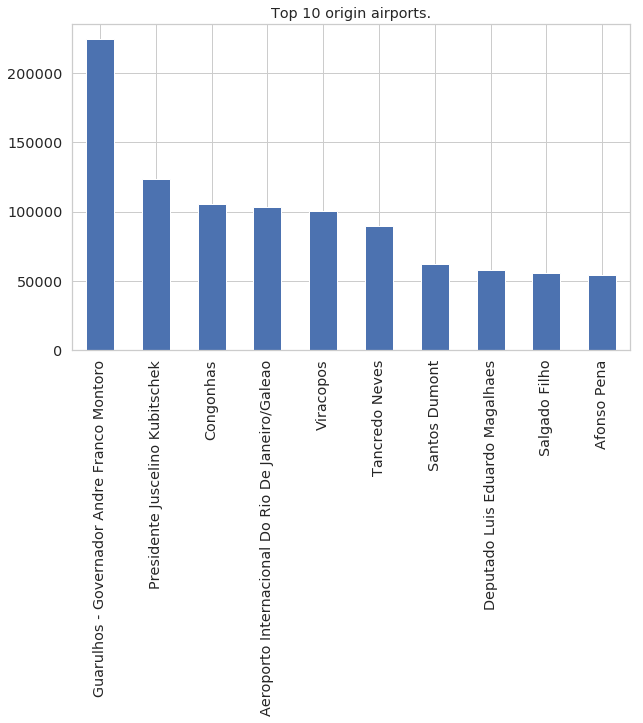

In [64]:
plt.figure(figsize=(10,6))
plot = df_train.airport_orig.value_counts().head(10).plot(kind="bar")
plot.set_title("Top 10 origin airports.")

These airports belong to the cities:

Text(0.5, 1.0, 'Top origin cities')

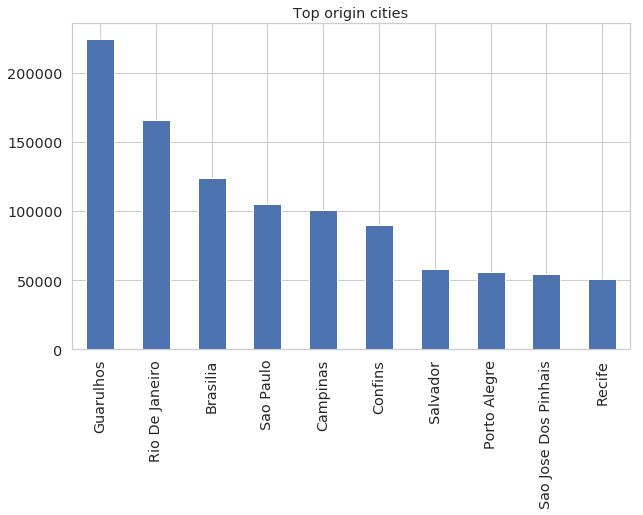

In [65]:
plt.figure(figsize=(10,6))
plot = df_train.city_orig.value_counts().head(10).plot(kind="bar")
plot.set_title("Top origin cities")

## Machine Learning algorithms

#### Excluding redundant attributes
   We can exclude the attribute Flights, since it doesn't add much information as it is directly correlated with the route of the aircraft and the airline, which in turn are present in other attributes.

  We have many attributes of location of origin and destination in our dataset, however, just the airport of origin and destination is enough to train our model. So we exclude all other location attributes. 

In [66]:
# ver
#df_train.drop(['flight_no', 'city_orig' , 'state_orig' , 'country_orig','city_dest','state_dest','country_dest', 'lon_dest' , 'lat_dest' , 'lon_orig','lat_orig'], axis=1, inplace=True)

In [90]:
# create new columns
df_train['month'] = df_train['arrival_actual'].dt.month
df_train.head(2)

,flight_no,airline_company,route_type,departure_schedule,departure_actual,arrival_schedule,arrival_actual,flight_status,just_code,airport_orig,city_orig,state_orig,country_orig,airport_dest,city_dest,state_dest,country_dest,lon_dest,lat_dest,lon_orig,lat_orig,month
1153587,TAM - 3875,TAM,Nacional,2017-03-14 10:50:00,2017-03-14 10:50:00,2017-03-14 13:08:00,2017-03-14 13:08:00,Realizado,NaN,Presidente Juscelino Kubitschek,Brasilia,DF,Brasil,Hercilio Luz,Florianopolis,SC,Brasil,-48.545966,-27.670118,-47.917235,-15.869737,3.0
2371574,AZU - 4482,AZUL,Nacional,2015-11-17 16:50:00,2015-11-17 16:47:00,2015-11-17 18:37:00,2015-11-17 18:24:00,Realizado,ANTECIPACAO DE HORARIO AUTORIZADA,Viracopos,Campinas,SP,Brasil,Campo Grande,Campo Grande,MS,Brasil,-54.674123,-20.468694,-47.137569,-23.008205,11.0


In [91]:
df_test['month'] = df_test['arrival_actual'].dt.month
df_test.head(2)

,flight_no,airline_company,route_type,departure_schedule,departure_actual,arrival_schedule,arrival_actual,flight_status,just_code,airport_orig,city_orig,state_orig,country_orig,airport_dest,city_dest,state_dest,country_dest,lon_dest,lat_dest,lon_orig,lat_orig,month
1231295,AUT - 2295,AUSTRAL LINEAS AREAS CIELOS DEL SUR S.A,Internacional,2017-05-02 22:00:00,NaT,2017-05-03 01:25:00,NaT,Cancelado,CANCELAMENTO POR MOTIVOS TECNICOS - OPERACIONAIS,Aeroporto Internacional Do Rio De Janeiro/Galeao,Rio De Janeiro,RJ,Brasil,Buenos Aires/Aeroparque,Buenos Aires/Aeroparque,N/I,Argentina,-58.536759,-34.816662,-43.249423,-22.813410,NaN
2382153,GLO - 1129,GOL,Nacional,2015-11-17 19:32:00,2015-11-17 19:32:00,2015-11-17 20:30:00,2015-11-17 20:30:00,Realizado,NaN,Campo Grande,Campo Grande,MS,Brasil,Regional De Maringa - Silvio Name Junior,Maringa,PR,Brasil,-52.016484,-23.476610,-54.674123,-20.468694,11.0


In [92]:
df_train['hour'] = df_train['arrival_actual'].dt.hour
df_train.head(2)

,flight_no,airline_company,route_type,departure_schedule,departure_actual,arrival_schedule,arrival_actual,flight_status,just_code,airport_orig,city_orig,state_orig,country_orig,airport_dest,city_dest,state_dest,country_dest,lon_dest,lat_dest,lon_orig,lat_orig,month,hour
1153587,TAM - 3875,TAM,Nacional,2017-03-14 10:50:00,2017-03-14 10:50:00,2017-03-14 13:08:00,2017-03-14 13:08:00,Realizado,NaN,Presidente Juscelino Kubitschek,Brasilia,DF,Brasil,Hercilio Luz,Florianopolis,SC,Brasil,-48.545966,-27.670118,-47.917235,-15.869737,3.0,13.0
2371574,AZU - 4482,AZUL,Nacional,2015-11-17 16:50:00,2015-11-17 16:47:00,2015-11-17 18:37:00,2015-11-17 18:24:00,Realizado,ANTECIPACAO DE HORARIO AUTORIZADA,Viracopos,Campinas,SP,Brasil,Campo Grande,Campo Grande,MS,Brasil,-54.674123,-20.468694,-47.137569,-23.008205,11.0,18.0


In [93]:
df_test['hour'] = df_test['arrival_actual'].dt.hour
df_test.head(2)

,flight_no,airline_company,route_type,departure_schedule,departure_actual,arrival_schedule,arrival_actual,flight_status,just_code,airport_orig,city_orig,state_orig,country_orig,airport_dest,city_dest,state_dest,country_dest,lon_dest,lat_dest,lon_orig,lat_orig,month,hour
1231295,AUT - 2295,AUSTRAL LINEAS AREAS CIELOS DEL SUR S.A,Internacional,2017-05-02 22:00:00,NaT,2017-05-03 01:25:00,NaT,Cancelado,CANCELAMENTO POR MOTIVOS TECNICOS - OPERACIONAIS,Aeroporto Internacional Do Rio De Janeiro/Galeao,Rio De Janeiro,RJ,Brasil,Buenos Aires/Aeroparque,Buenos Aires/Aeroparque,N/I,Argentina,-58.536759,-34.816662,-43.249423,-22.813410,NaN,NaN
2382153,GLO - 1129,GOL,Nacional,2015-11-17 19:32:00,2015-11-17 19:32:00,2015-11-17 20:30:00,2015-11-17 20:30:00,Realizado,NaN,Campo Grande,Campo Grande,MS,Brasil,Regional De Maringa - Silvio Name Junior,Maringa,PR,Brasil,-52.016484,-23.476610,-54.674123,-20.468694,11.0,20.0


In [94]:
df_train['dt_arr'] = (df_train['arrival_schedule'] - df_train['arrival_actual'])
df_train['dt_arr_min'] = df_train['dt_arr'] / np.timedelta64(1, 'm')
df_train.head(3)

,flight_no,airline_company,route_type,departure_schedule,departure_actual,arrival_schedule,arrival_actual,flight_status,just_code,airport_orig,city_orig,state_orig,country_orig,airport_dest,city_dest,state_dest,country_dest,lon_dest,lat_dest,lon_orig,lat_orig,month,hour,dt_arr,dt_arr_min
1153587,TAM - 3875,TAM,Nacional,2017-03-14 10:50:00,2017-03-14 10:50:00,2017-03-14 13:08:00,2017-03-14 13:08:00,Realizado,NaN,Presidente Juscelino Kubitschek,Brasilia,DF,Brasil,Hercilio Luz,Florianopolis,SC,Brasil,-48.545966,-27.670118,-47.917235,-15.869737,3.0,13.0,0 days 00:00:00,0.0
2371574,AZU - 4482,AZUL,Nacional,2015-11-17 16:50:00,2015-11-17 16:47:00,2015-11-17 18:37:00,2015-11-17 18:24:00,Realizado,ANTECIPACAO DE HORARIO AUTORIZADA,Viracopos,Campinas,SP,Brasil,Campo Grande,Campo Grande,MS,Brasil,-54.674123,-20.468694,-47.137569,-23.008205,11.0,18.0,0 days 00:13:00,13.0
1171227,AZU - 4267,AZUL,Regional,2017-04-24 12:12:00,2017-04-24 12:12:00,2017-04-24 13:10:00,2017-04-24 13:10:00,Realizado,NaN,Salgado Filho,Porto Alegre,RS,Brasil,Hercilio Luz,Florianopolis,SC,Brasil,-48.545966,-27.670118,-51.175381,-29.993473,4.0,13.0,0 days 00:00:00,0.0


In [95]:
df_test['dt_arr'] = (df_test['arrival_schedule'] - df_test['arrival_actual'])
df_test['dt_arr_min'] = df_test['dt_arr'] / np.timedelta64(1, 'm')
df_test.head(3)

,flight_no,airline_company,route_type,departure_schedule,departure_actual,arrival_schedule,arrival_actual,flight_status,just_code,airport_orig,city_orig,state_orig,country_orig,airport_dest,city_dest,state_dest,country_dest,lon_dest,lat_dest,lon_orig,lat_orig,month,hour,dt_arr,dt_arr_min
1231295,AUT - 2295,AUSTRAL LINEAS AREAS CIELOS DEL SUR S.A,Internacional,2017-05-02 22:00:00,NaT,2017-05-03 01:25:00,NaT,Cancelado,CANCELAMENTO POR MOTIVOS TECNICOS - OPERACIONAIS,Aeroporto Internacional Do Rio De Janeiro/Galeao,Rio De Janeiro,RJ,Brasil,Buenos Aires/Aeroparque,Buenos Aires/Aeroparque,N/I,Argentina,-58.536759,-34.816662,-43.249423,-22.813410,NaN,NaN,NaT,NaN
2382153,GLO - 1129,GOL,Nacional,2015-11-17 19:32:00,2015-11-17 19:32:00,2015-11-17 20:30:00,2015-11-17 20:30:00,Realizado,NaN,Campo Grande,Campo Grande,MS,Brasil,Regional De Maringa - Silvio Name Junior,Maringa,PR,Brasil,-52.016484,-23.476610,-54.674123,-20.468694,11.0,20.0,0 days 00:00:00,0.0
1218689,TAM - 3410,TAM,Nacional,2017-04-12 09:40:00,2017-04-12 10:00:00,2017-04-12 11:05:00,2017-04-12 11:25:00,Realizado,LIBERACAO SERV. TRAFEGO AEREO/ANTECIPACAO,Hercilio Luz,Florianopolis,SC,Brasil,Aeroporto Internacional Do Rio De Janeiro/Galeao,Rio De Janeiro,RJ,Brasil,-43.249423,-22.813410,-48.545966,-27.670118,4.0,11.0,-1 days +23:40:00,-20.0


In [96]:
df_train['late'] = df_train['dt_arr_min'].apply(lambda x: 1 if x < 0 else 0)

In [97]:
df_test['late'] = df_test['dt_arr_min'].apply(lambda x: 1 if x < 0 else 0)

In [98]:
df_train.isna().sum()

flight_no                  0
airline_company            0
route_type                 0
departure_schedule         0
departure_actual      188039
arrival_schedule           0
arrival_actual        188039
flight_status              0
just_code             981831
airport_orig               0
city_orig                  0
state_orig                 0
country_orig               0
airport_dest               0
city_dest                  0
state_dest                 0
country_dest               0
lon_dest                   0
lat_dest                   0
lon_orig                   0
lat_orig                   0
month                 188039
hour                  188039
dt_arr                188039
dt_arr_min            188039
late                       0
dtype: int64

In [99]:
df_test.isna().sum()

flight_no                  0
airline_company            0
route_type                 0
departure_schedule         0
departure_actual      101157
arrival_schedule           0
arrival_actual        101157
flight_status              0
just_code             528381
airport_orig               0
city_orig                  0
state_orig                 0
country_orig               0
airport_dest               0
city_dest                  0
state_dest                 0
country_dest               0
lon_dest                   0
lat_dest                   0
lon_orig                   0
lat_orig                   0
month                 101157
hour                  101157
dt_arr                101157
dt_arr_min            101157
late                       0
dtype: int64

In [100]:
df_train = df_train.dropna()

In [101]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

numerical_features = ['month', 'hour']
categorical_features = ['airport_orig', 'airport_dest','flight_no', 'airline_company']
numerical_pipeline = make_pipeline(SimpleImputer(), StandardScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown = "ignore"))

preprocessor = make_column_transformer((numerical_pipeline, numerical_features), 
                                       (categorical_pipeline, categorical_features))

In [102]:
X_tr = df_train.drop('late', axis=1)
y_tr = df_train['late']

X_tr = X_tr.sample(n=10000)
y_tr = y_tr.sample(n=10000)

In [103]:
X_tes = df_test.drop('late', axis=1)
y_tes = df_test['late']

y_tes = y_tes.sample(n=10000)
y_tes = y_tes.sample(n=10000)

### Model selection

In [104]:
from sklearn.model_selection import cross_validate

def crossVal_model(preprocessor, estimator, X_tr, y_tr):
    
    #model
    model = make_pipeline(preprocessor, estimator)
    
    #cross validation
    scr = cross_validate(model, X_tr, y_tr, cv=5, scoring=['f1', 'precision', 'recall'])
    
    #metrics
    print("reacall = {:.0%}".format(scr['test_recall'].mean()))
    print("precision = {:.0%}".format(scr['test_precision'].mean()))
    print("f1 = {:.0%}".format(scr['test_f1'].mean()))
    
    return model, scr


### Tree

In [105]:
from sklearn.tree import DecisionTreeClassifier

estimator = DecisionTreeClassifier()
m_tree = crossVal_model(preprocessor, estimator, X_tr, y_tr)

reacall = 43%
precision = 46%
f1 = 44%


### Stochastic Gradient Descent

In [106]:
from sklearn.linear_model import SGDClassifier

estimator = SGDClassifier()
m_sgdc = crossVal_model(preprocessor, estimator, X_tr, y_tr)


reacall = 40%
precision = 46%
f1 = 43%


### K nearest neighbors

In [107]:
from sklearn.neighbors import KNeighborsClassifier

estimator = KNeighborsClassifier()
m_kn = crossVal_model(preprocessor, estimator, X_tr, y_tr)


reacall = 44%
precision = 46%
f1 = 45%


### Linear SVC

In [108]:
from sklearn.svm import LinearSVC

estimator = LinearSVC()
m_svc = crossVal_model(preprocessor, estimator, X_tr, y_tr)

reacall = 40%
precision = 46%
f1 = 43%


### Test

In [109]:
from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score, f1_score

model = m_tree[0]
model.fit(X_tr, y_tr)
y_pred = model.predict(X_tes)
plot_confusion_matrix(model, X_tes, y_tes);

p = precision_score(y_tes, y_pred)
r = recall_score(y_tes, y_pred)
f1 = f1_score(y_tes, y_pred)

print('recall = {:.0%}'.format(r))
print('precision = {:.0%}'.format(p))
print('f1 = {:.0%}'.format(f1))

ValueError: Found input variables with inconsistent numbers of samples: [10000, 889882]

In [ ]:
y_pred[100:120]

In [ ]:
np.array(y_tes[100:120])